In [12]:
import numpy as np
import pysim
from pysim.state_space import StateSpace
from pysim.transfer_function import Transfer
from pysim.pid_controller import PIDController
from pysim.system_graph import SystemGraph
from pysim.system import Pendulum
from pysim.simulator import TimerVariable

In [13]:
system = Pendulum(1,1)
actuator = StateSpace.from_system(system)
actuator.init(np.array([[0.1],[0]]))
T = 1
# actuator = Transfer((2,),(T,1))

In [14]:
pid = PIDController()
actuator.reset()
input = TimerVariable(fn=lambda t:-0.1)
graph = SystemGraph(systems=[input,pid,actuator],
                    output=2,
                    connections=(((0,2),1,(1,-1)),
                                 (1,2)))

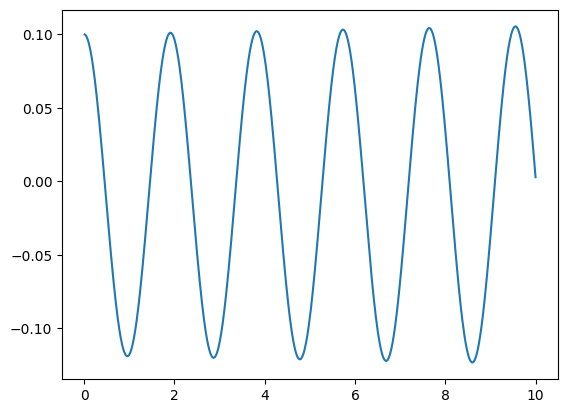

array([1.00000000e+01, 2.80628233e-03])

In [15]:
graph.reset()
pid.reset()
pid.kp = 1
pid.ki = 0
pid.kd = 0
y = graph.simulate()
y[-1]

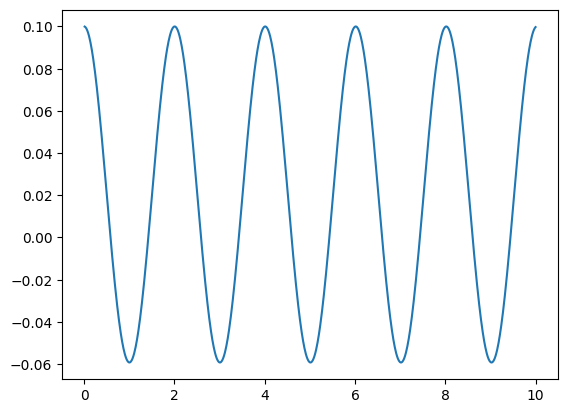

In [16]:
system = Pendulum(1,1)
actuator = StateSpace.from_system(system)
actuator.init(np.array([[0.1],[0]]))
actuator.u = 0.2
_ = actuator.simulate()

In [17]:
actuator._A

array([[ 0.  ,  1.  ],
       [-9.81,  0.  ]])

In [18]:
system.A[:] = np.ones((2,2))